## Import Package

In [ ]:
import os
import zipfile
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras
from tensorflow.keras import Model
from google.colab import files
from tensorflow.keras.preprocessing import image

In [ ]:
#Extract the archive
zip_ref = zipfile.ZipFile("/content/archive.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

## Prepare the Dataset

In [ ]:
folder_mappings = {
    '/content/tmp/Dataset': '/content/tmp/soil_type',
    '/content/tmp/soil_type/Train': '/content/tmp/soil_type/train',
    '/content/tmp/soil_type/test': '/content/tmp/soil_type/validation',
    '/content/tmp/soil_type/train/Alluvial soil': '/content/tmp/soil_type/train/alluvial',
    '/content/tmp/soil_type/train/Black Soil' : '/content/tmp/soil_type/train/black',
    '/content/tmp/soil_type/train/Clay soil' : '/content/tmp/soil_type/train/clay',
    '/content/tmp/soil_type/train/Red soil' : '/content/tmp/soil_type/train/red',
    '/content/tmp/soil_type/validation/Alluvial soil': '/content/tmp/soil_type/validation/alluvial',
    '/content/tmp/soil_type/validation/Black Soil' : '/content/tmp/soil_type/validation/black',
    '/content/tmp/soil_type/validation/Clay soil' : '/content/tmp/soil_type/validation/clay',
    '/content/tmp/soil_type/validation/Red soil' : '/content/tmp/soil_type/validation/red',
}

# Changing the folder name
for old_folder_path, new_folder_path in folder_mappings.items():
    if os.path.exists(new_folder_path):
        shutil.rmtree(new_folder_path)  # Delete the destination folder if it already exists and is not empty
    os.rename(old_folder_path, new_folder_path)


In [ ]:
# List of directories and prefixes to be used
directories = ['/content/tmp/soil_type/train/alluvial',
               '/content/tmp/soil_type/train/black',
               '/content/tmp/soil_type/train/clay',
               '/content/tmp/soil_type/train/red',
               '/content/tmp/soil_type/validation/alluvial',
               '/content/tmp/soil_type/validation/black',
               '/content/tmp/soil_type/validation/clay',
               '/content/tmp/soil_type/validation/red']

prefixes = ['alluvial_', 'black_', 'clay_', 'red_', 'alluvial_', 'black_', 'clay_', 'red_']

# Performing file renaming for each directory and prefix
for directory, prefix in zip(directories, prefixes):
    os.chdir(directory)
    files = os.listdir()
    for i, file in enumerate(files):
        new_name = prefix + str(i+1) + '.jpg'
        os.rename(file, new_name)

In [ ]:
# Define our example directories and files
base_dir = '/content/tmp/soil_type'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

# Directory with training pictures
train_alluvial_dir = os.path.join(train_dir, 'alluvial')
train_black_dir = os.path.join(train_dir, 'black')
train_clay_dir = os.path.join(train_dir, 'clay')
train_red_dir = os.path.join(train_dir, 'red')

# Directory with validation pictures
validation_alluvial_dir = os.path.join(validation_dir, 'alluvial')
validation_black_dir = os.path.join(train_dir, 'black')
validation_clay_dir = os.path.join(train_dir, 'clay')
validation_red_dir = os.path.join(train_dir, 'red')

Sample alluvial soil image:


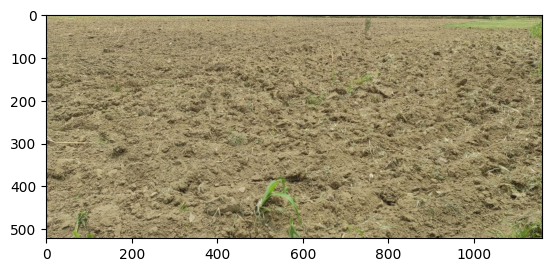

Each image has shape: (667, 1000, 3)
total training alluvial images : 528
total training black images : 231
total training clay images : 199
total training red images : 264
total validation alluvial images : 54
total validation black images : 231
total validation clay images : 199
total validation red images : 264


In [ ]:
print("Sample alluvial soil image:")
plt.imshow(load_img(f"{os.path.join(train_alluvial_dir, os.listdir(train_alluvial_dir)[1])}"))
plt.show()

# Load the first example of alluvial soil
sample_image  = load_img(f"{os.path.join(train_alluvial_dir, os.listdir(train_alluvial_dir)[0])}")
# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)
print(f"Each image has shape: {sample_array.shape}")

print('total training alluvial images :', len(os.listdir(      train_alluvial_dir ) ))
print('total training black images :', len(os.listdir(      train_black_dir ) ))
print('total training clay images :', len(os.listdir(      train_clay_dir ) ))
print('total training red images :', len(os.listdir(      train_red_dir ) ))

print('total validation alluvial images :', len(os.listdir( validation_alluvial_dir ) ))
print('total validation black images :', len(os.listdir(      validation_black_dir ) ))
print('total validation clay images :', len(os.listdir(      validation_clay_dir ) ))
print('total validation red images :', len(os.listdir(      validation_red_dir ) ))

## Training, Validation, and Test Generator

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class
  # Normalize pixel values and set arguments to augment the images
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(260, 260))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Validation data should not be augmented
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                batch_size=20,
                                                                class_mode='categorical',
                                                                target_size=(260, 260))

  return train_generator, validation_generator

In [ ]:
# Test generators
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

# Fetching class names from the train generator
class_names_train = list(train_generator.class_indices.keys())
print("Class names train:", class_names_train)

# Fetching class names from the validation generator
class_names_validation = list(validation_generator.class_indices.keys())
print("Class names validation:", class_names_validation)

Found 1222 images belonging to 4 classes.
Found 341 images belonging to 4 classes.
Class names train: ['alluvial', 'black', 'clay', 'red']
Class names validation: ['alluvial', 'black', 'clay', 'red']


## Transfer Learning 1

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-14 06:29:36--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  94.1MB/s    in 0.9s    

2023-06-14 06:29:37 (94.1 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  pre_trained_model = InceptionV3(input_shape = (260, 260, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 260, 260, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 129, 129, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 129, 129, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
# Define a Callback class that stops training once accuracy reaches 95%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
def output_of_last_layer(pre_trained_model):
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 14, 14, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [ ]:
# Flatten the output layer to 1 dimension
x = keras.layers.Flatten()(last_output)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = keras.layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.2
x = keras.layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = keras.layers.Dense  (4, activation='softmax')(x)

# Append the dense network to the base model
model = Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
model.summary()

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(0.0001),  # Low learning rate
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 260, 260, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 129, 129, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 129, 129, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

# evaluasi model

In [ ]:
callbacks = myCallback()
steps_per_epoch = 1222 // 20
validation_steps = 341 // 20
history = model.fit(train_generator,
                    epochs=100,
                    verbose = 2,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator,
                    validation_steps=validation_steps,
                    callbacks=callbacks)

Epoch 1/100
61/61 - 47s - loss: 0.8900 - accuracy: 0.6589 - val_loss: 0.5617 - val_accuracy: 0.8118 - 47s/epoch - 768ms/step
Epoch 2/100
61/61 - 31s - loss: 0.4527 - accuracy: 0.8361 - val_loss: 0.4100 - val_accuracy: 0.8706 - 31s/epoch - 504ms/step
Epoch 3/100
61/61 - 30s - loss: 0.3885 - accuracy: 0.8686 - val_loss: 0.3055 - val_accuracy: 0.9029 - 30s/epoch - 486ms/step
Epoch 4/100
61/61 - 32s - loss: 0.2966 - accuracy: 0.9002 - val_loss: 0.2709 - val_accuracy: 0.8941 - 32s/epoch - 531ms/step
Epoch 5/100
61/61 - 29s - loss: 0.2870 - accuracy: 0.8960 - val_loss: 0.2313 - val_accuracy: 0.9176 - 29s/epoch - 482ms/step
Epoch 6/100
61/61 - 32s - loss: 0.2630 - accuracy: 0.9002 - val_loss: 0.2500 - val_accuracy: 0.9265 - 32s/epoch - 531ms/step
Epoch 7/100
61/61 - 30s - loss: 0.2164 - accuracy: 0.9218 - val_loss: 0.2332 - val_accuracy: 0.9206 - 30s/epoch - 500ms/step
Epoch 8/100
61/61 - 32s - loss: 0.1951 - accuracy: 0.9393 - val_loss: 0.2209 - val_accuracy: 0.9206 - 32s/epoch - 529ms/step


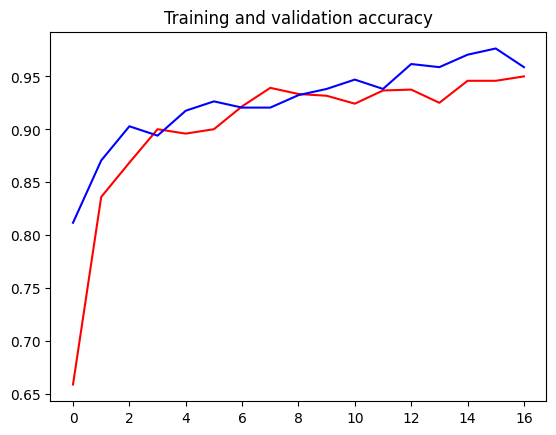

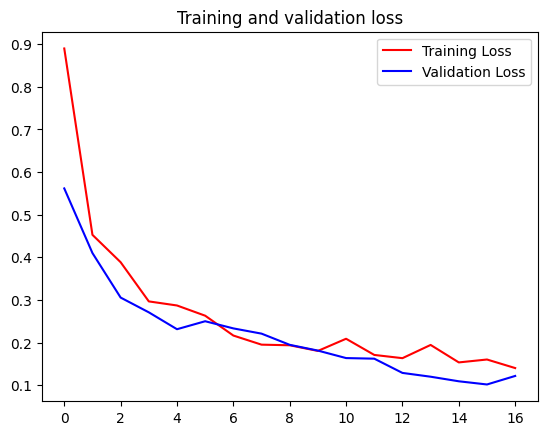

In [ ]:
# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

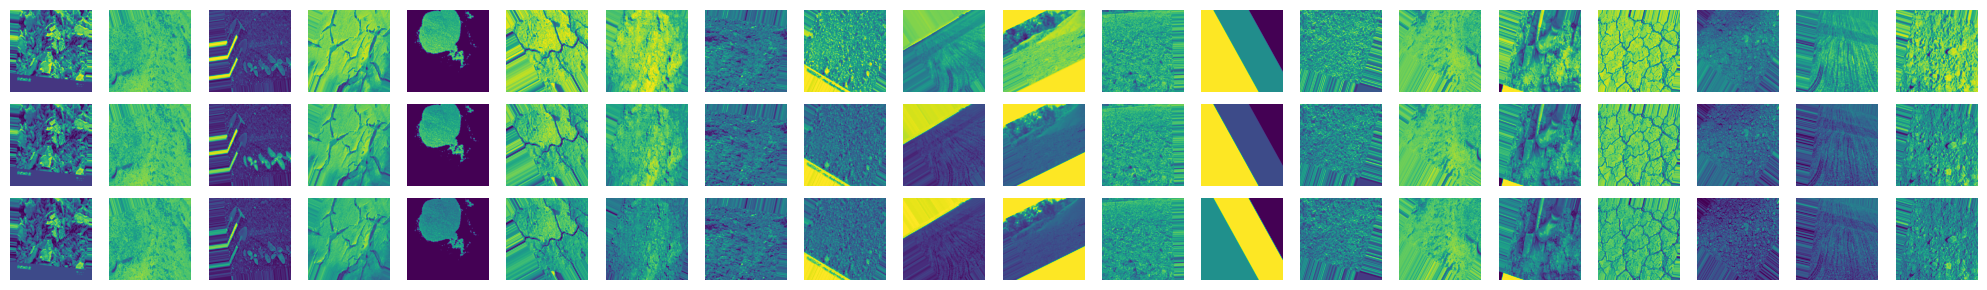

In [ ]:
# Obtaining the train matrix
train_data = train_generator.next()[0]

# Calculating the number of samples and classes
num_samples = train_data.shape[0]
num_classes = train_data.shape[3]

# Displaying the train matrix
fig, axes = plt.subplots(num_classes, num_samples, figsize=(num_samples, num_classes))

for i in range(num_classes):
    for j in range(num_samples):
        axes[i][j].imshow(train_data[j, :, :, i])
        axes[i][j].axis('off')

plt.tight_layout()
plt.show()

Found 341 images belonging to 4 classes.
18/18 [==============================] - 4s 163ms/step


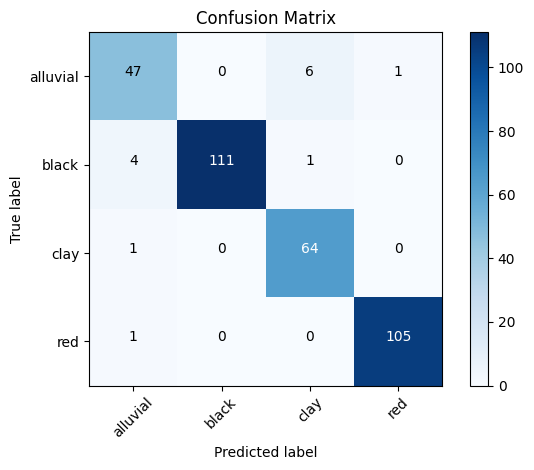

Classification Report:
               precision    recall  f1-score   support

    alluvial       0.89      0.87      0.88        54
       black       1.00      0.96      0.98       116
        clay       0.90      0.98      0.94        65
         red       0.99      0.99      0.99       106

    accuracy                           0.96       341
   macro avg       0.94      0.95      0.95       341
weighted avg       0.96      0.96      0.96       341



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the validation dataset
labels = validation_generator.class_indices.keys()
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    validation_dir,  # Path to test directory
    target_size=(260, 260),
    batch_size=20,
    class_mode='categorical',
    shuffle=False
)

# Make predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as an image
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mtx[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Create classification report
classification_rep = classification_report(y_true, y_pred, target_names=labels)
print('Classification Report:\n', classification_rep)

Saving download (4).jpeg to download (4).jpeg
Saving download (3).jpeg to download (3).jpeg
Saving download (2).jpeg to download (2).jpeg
Saving download (1).jpeg to download (1).jpeg
1/1 [==============================] - 0s 24ms/step


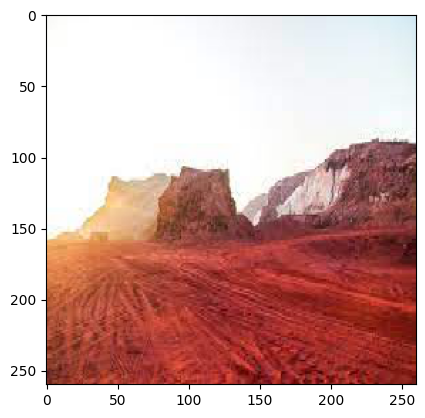

alluvial: 0.02%
black: 0.00%
clay: 0.00%
red: 99.98%

Result: 
red: 99.98%
1/1 [==============================] - 0s 24ms/step


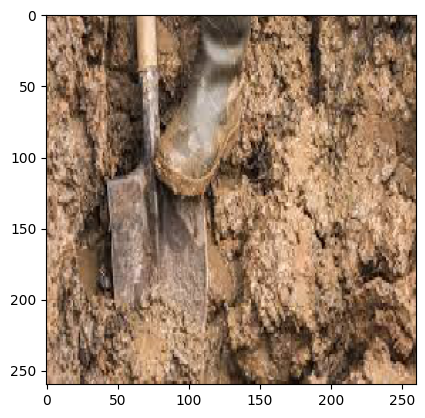

alluvial: 2.62%
black: 0.03%
clay: 97.33%
red: 0.01%

Result: 
clay: 97.33%
1/1 [==============================] - 0s 29ms/step


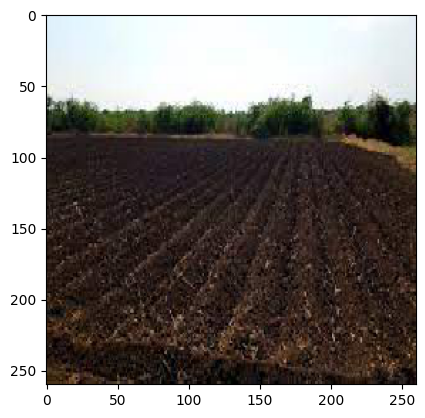

alluvial: 59.69%
black: 38.21%
clay: 0.01%
red: 2.09%

Result: 
alluvial: 59.69%
1/1 [==============================] - 0s 24ms/step


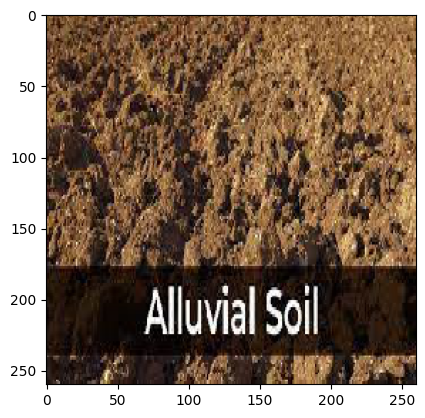

alluvial: 96.05%
black: 2.97%
clay: 0.96%
red: 0.02%

Result: 
alluvial: 96.05%


In [ ]:
from google.colab import files

labels = train_generator.class_indices.keys()
uploaded = files.upload()

for fn in uploaded.keys():
    # Load the image
    img = image.load_img(fn, target_size=(260, 260))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Normalization
    x = x / 255.0

    # Predicting the image
    proba = model.predict(x)[0]
    maxx = proba.max()

    # Displaying the image
    plt.imshow(img)
    plt.show()

    # Displaying the prediction results
    for label, p in zip(labels, proba):
        print("{}: {:.2f}%".format(label, p * 100))

    # Displaying the best prediction result
    for label, p in zip(labels, proba):
        if p <= 0.4:
            continue
        elif p == maxx:
            if p >= 0.5:
                print('\nResult: ')
                print("{}: {:.2f}%".format(label, p * 100))
            else:
                print('\nTanah ini tidak terdeteksi!')


In [ ]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# save model

In [ ]:
saved_model_path = "./model_2.h5"

model.save(saved_model_path)

In [ ]:
files.download('model_2.h5')